## Recursion

It is legal for a function to call itself.
It may not be obvious why that is a good thing, but it turns out to be one of the most magical things a program can do.
Here's an example.

In [ ]:
def countdown(n):
    if n <= 0:
        print('Blastoff!')
    else:
        print(n)
        countdown(n-1)

If `n` is 0 or negative, `countdown` outputs the word, "Blastoff!" Otherwise, it
outputs `n` and then calls itself, passing `n-1` as an argument.

Here's what happens when we call this function with the argument `3`.

In [ ]:
countdown(3)

3
2
1
Blastoff!


The execution of `countdown` begins with `n=3`, and since `n` is greater
than `0`, it displays `3`, and then calls itself\...

> The execution of `countdown` begins with `n=2`, and since `n` is
> greater than `0`, it displays `2`, and then calls itself\...
>
> > The execution of `countdown` begins with `n=1`, and since `n` is
> > greater than `0`, it displays `1`, and then calls itself\...
> >
> > > The execution of `countdown` begins with `n=0`, and since `n` is
> > > not greater than `0`, it displays "Blastoff!" and returns.
> >
> > The `countdown` that got `n=1` returns.
>
> The `countdown` that got `n=2` returns.

The `countdown` that got `n=3` returns.

**A function that calls itself** is **recursive**.
As another example, we can write a function that prints a string `n` times.

In [ ]:
def print_n_times(string, n):
    if n > 0:
        print(string)
        print_n_times(string, n-1)

If `n` is positive, `print_n_times` displays the value of `string` and then calls itself, passing along `string` and `n-1` as arguments.

If `n` is `0` or negative, the condition is false and `print_n_times` does nothing.

Here's how it works.

In [ ]:
print_n_times('Spam ', 4)

Spam 
Spam 
Spam 
Spam 


For simple examples like this, it is probably easier to use a `for`
loop. But we will see examples later that are hard to write with a `for`
loop and easy to write with recursion, so it is good to start early.

### Stack diagrams for recursive functions

Here's a stack diagram that shows the frames created when we called `countdown` with `n = 3`.

In [ ]:
from diagram import make_frame, Stack

frames = []
for n in [3,2,1,0]:
    d = dict(n=n)
    frame = make_frame(d, name='countdown', dy=-0.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

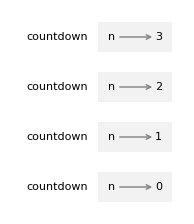

In [ ]:
from diagram import diagram, adjust


width, height, x, y = [1.74, 2.04, 1.05, 1.77]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

The four `countdown` frames have different values for the parameter `n`.
The bottom of the stack, where `n=0`, is called the **base case**.
It does not make a recursive call, so there are no more frames.

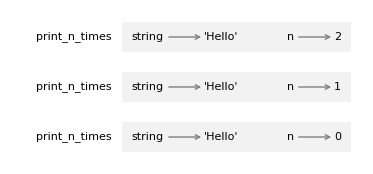

In [ ]:
from diagram import make_frame, Stack
from diagram import diagram, adjust

frames = []
for n in [2,1,0]:
    d = dict(string='Hello', n=n)
    frame = make_frame(d, name='print_n_times', dx=1.3, loc='left')
    frames.append(frame)

stack = Stack(frames, dy=-0.5)

width, height, x, y = [3.53, 1.54, 1.54, 1.27]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

### Infinite recursion

If a recursion never reaches a base case, it goes on making recursive
calls forever, and the program never terminates. This is known as
**infinite recursion**, and it is generally not a good idea.
Here's a minimal function with an infinite recursion.

In [ ]:
def recurse():
    recurse()

Every time `recurse` is called, it calls itself, which creates another frame.
In Python, there is a limit to the number of frames that can be on the stack at the same time.
If a program exceeds the limit, it causes a runtime error.

In [ ]:
%xmode Context

Exception reporting mode: Context


In [ ]:
%%expect RecursionError

recurse()

The traceback indicates that there were almost 3000 frames on the stack when the error occurred.

If you encounter an infinite recursion by accident, review your function to confirm that there is a base case that does not make a recursive call. And if there is a base case, check whether you are guaranteed to reach it.

## Recursion with return values

Now that we can write functions with return values, we can write recursive functions with return values, and with that capability, we have passed an important threshold -- the subset of Python we have is now **Turing complete**, which means that we can perform any computation that can be described by an algorithm.

To demonstrate recursion with return values, we'll evaluate a few recursively defined mathematical functions.
A recursive definition is similar to a circular definition, in the sense that the definition refers to the thing being defined. A truly circular definition is not very useful:

> vorpal: An adjective used to describe something that is vorpal.

If you saw that definition in the dictionary, you might be annoyed. 
On the other hand, if you looked up the definition of the factorial function, denoted with the symbol $!$, you might get something like this: 

$$\begin{aligned}
0! &= 1 \\
n! &= n~(n-1)!
\end{aligned}$$ 

This definition says that the factorial of $0$ is $1$, and the factorial of any other value, $n$, is $n$ multiplied by the factorial of $n-1$.

```{figure} ../images/fibonacci.png
:width: 500px
:name: fibonacci

Fibonacci Sequence
```

If you can write a recursive definition of something, you can write a Python program to evaluate it. 
Following an incremental development process, we'll start with a function that take `n` as a parameter and always returns `0`.

In [ ]:
def factorial(n):
    return 0

Now let's add the first part of the definition -- if the argument happens to be `0`, all we have to do is return `1`:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return 0

Now let's fill in the second part -- if `n` is not `0`, we have to make a recursive
call to find the factorial of `n-1` and then multiply the result by `n`:

In [ ]:
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        return n * recurse

The flow of execution for this program is similar to the flow of `countdown` in Chapter 5.
If we call `factorial` with the value `3`:

Since `3` is not `0`, we take the second branch and calculate the factorial
of `n-1`\...

> Since `2` is not `0`, we take the second branch and calculate the
> factorial of `n-1`\...
>
> > Since `1` is not `0`, we take the second branch and calculate the
> > factorial of `n-1`\...
> >
> > > Since `0` equals `0`, we take the first branch and return `1` without
> > > making any more recursive calls.
> >
> > The return value, `1`, is multiplied by `n`, which is `1`, and the
> > result is returned.
>
> The return value, `1`, is multiplied by `n`, which is `2`, and the result
> is returned.

The return value `2` is multiplied by `n`, which is `3`, and the result,
`6`, becomes the return value of the function call that started the whole
process.

The following figure shows the stack diagram for this sequence of function calls.

In [ ]:
from diagram import Frame, Stack, make_binding

main = Frame([], name='__main__', loc='left')
frames = [main]

ns = 3, 2, 1
recurses = 2, 1, 1
results = 6, 2, 1

for n, recurse, result in zip(ns, recurses, results):
    binding1 = make_binding('n', n)
    binding2 = make_binding('recurse', recurse)
    frame = Frame([binding1, binding2], 
                  name='factorial', value=result,
                  loc='left', dx=1.2)
    frames.append(frame)
    
binding1 = make_binding('n', 0)
frame = Frame([binding1], name='factorial', value=1, 
              shim=1.2, loc='left', dx=1.4)
frames.append(frame)

stack = Stack(frames, dy=-0.45)

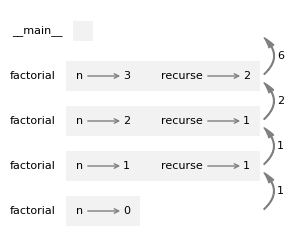

In [ ]:
from diagram import diagram, adjust

width, height, x, y = [2.74, 2.26, 0.73, 2.05]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

The return values are shown being passed back up the stack.
In each frame, the return value is the product of `n` and `recurse`.

In the last frame, the local variable `recurse` does not exist because the branch that creates it does not run.